In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys

if '..' not in sys.path:
    sys.path.append('..')

from data import ThreeBalls2DFreeFallDataset

import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.nn.functional import mse_loss as mse_pytorch

import reservoirpy as rpy
from reservoirpy.observables import mse as mse_esn

from itertools import product
from tqdm.notebook import tqdm_notebook

from models import VanilaRNN, GRU, LSTM, ESN, SeqESN, ParallelESN, GroupedESN

rpy.verbosity(0)

0

In [3]:
batch_size = 32

train_data, test_data = ThreeBalls2DFreeFallDataset.train_test_split('../data/raw/three-balls-2d-free-fall-full', test_frac=0.2)

train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size)

Test size:  10562
train_test_split response: test fraction rounded to 0.19998485250123074 (10562 simulations)


# Vanila RNN

VanilaRNN(
  (rnn): RNN(9, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=48, bias=True)
)
Epoch 0 complete. Training loss: 109.28339067759225
Epoch 1 complete. Training loss: 0.8375362683436833
Epoch 2 complete. Training loss: 0.6611254404706415
Epoch 3 complete. Training loss: 0.6313799461204326
Epoch 4 complete. Training loss: 0.6213990395772271
Epoch 5 complete. Training loss: 0.6161954875278752
Epoch 6 complete. Training loss: 0.6127259447530378
Epoch 7 complete. Training loss: 0.6100265598215628
Epoch 8 complete. Training loss: 0.6076961124344962
Epoch 9 complete. Training loss: 0.6055398440221325
Epoch 10 complete. Training loss: 0.6034675499249715
Epoch 11 complete. Training loss: 0.6014316207874799
Epoch 12 complete. Training loss: 0.5994080047967145
Epoch 13 complete. Training loss: 0.5973863634717418
Epoch 14 complete. Training loss: 0.5953680471575353
Epoch 15 complete. Training loss: 0.5933523339481326
Epoch 16 complete. Training loss: 0.591344020780525

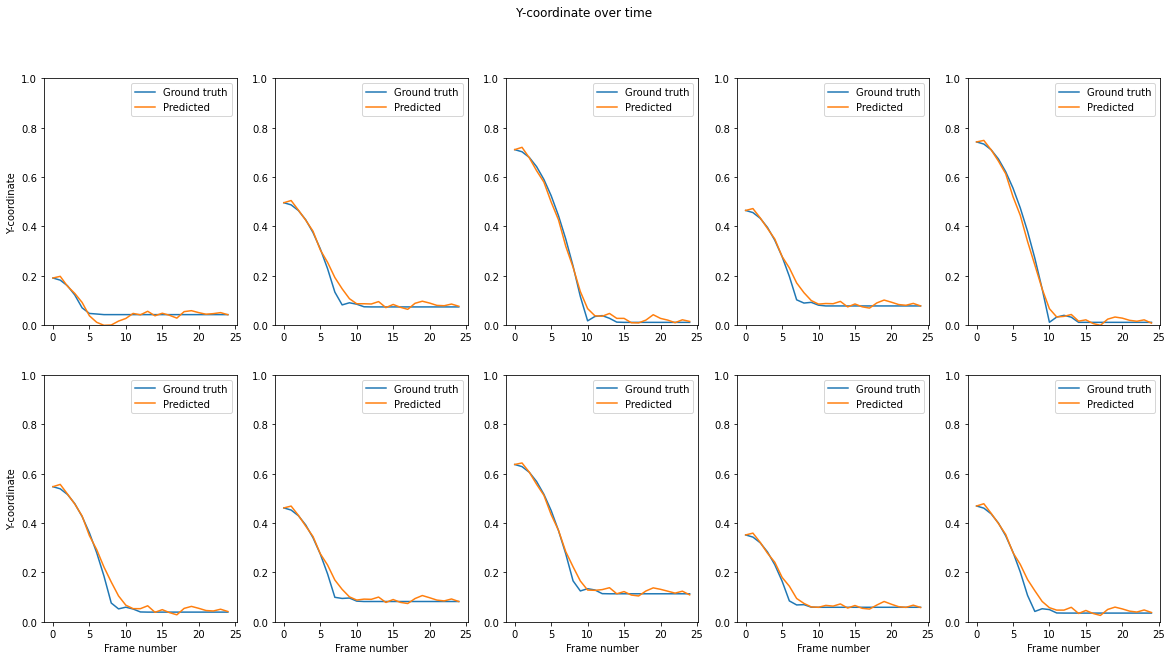

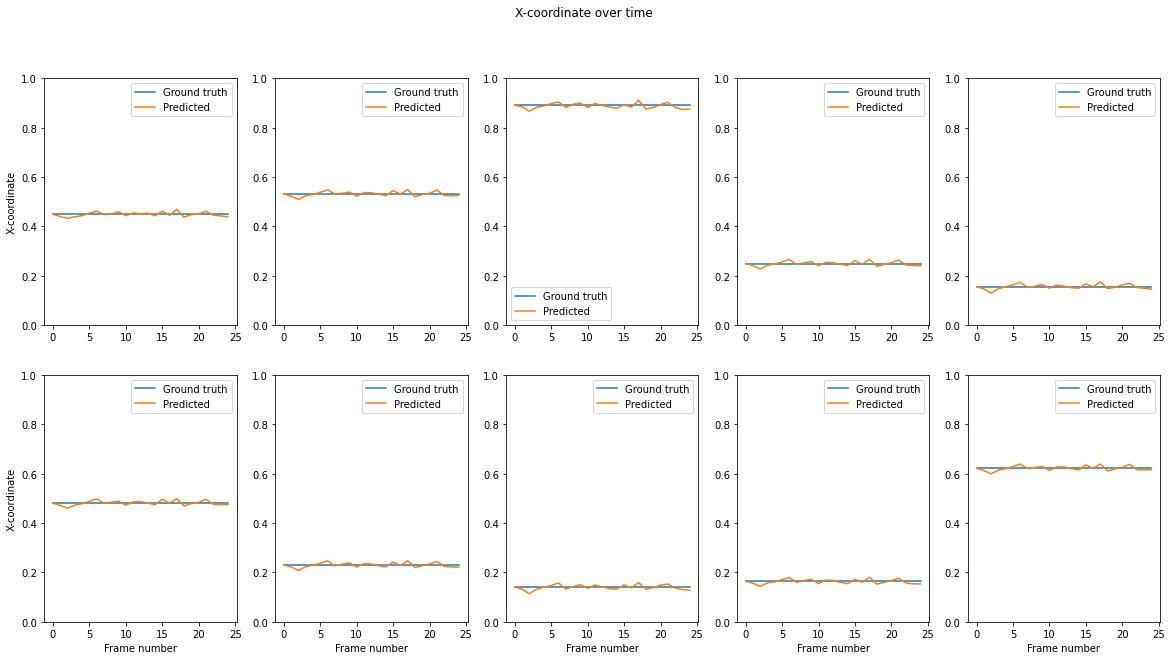

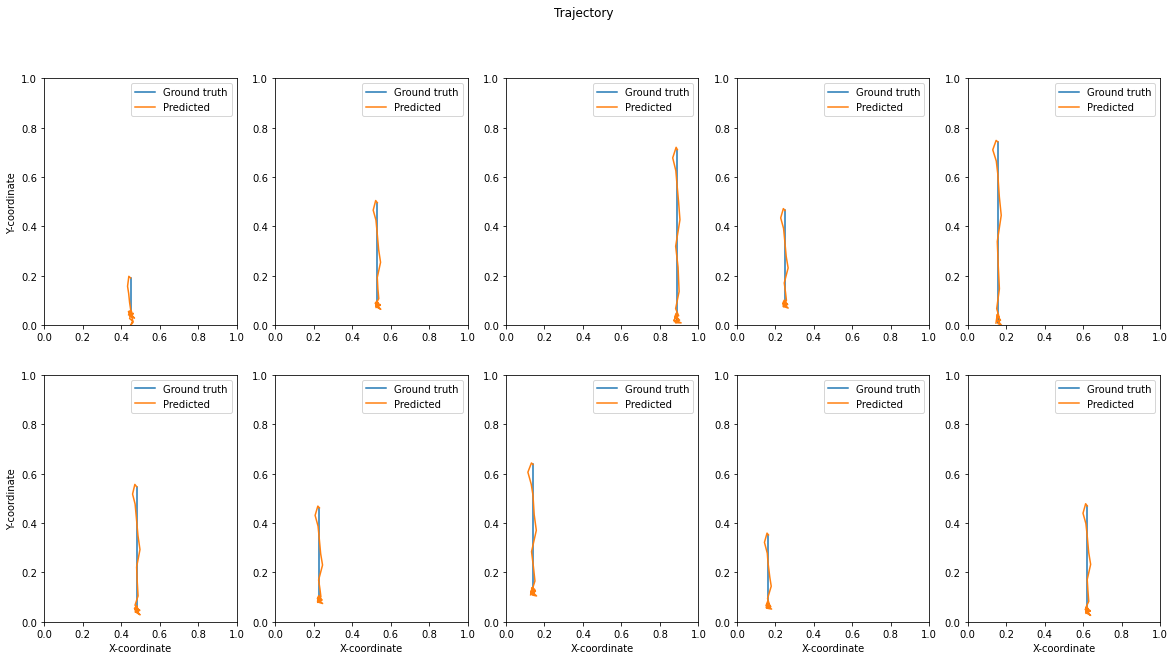

tensor(0.0194, grad_fn=<PowBackward0>)

In [4]:
vanila_rnn = VanilaRNN.train_model(train_dataloader=train_dataloader, error_threshold=1000, input_dim=9, hidden_dim=64, num_rnns=1, output_dim=48, dropout_prob=0)
VanilaRNN.calculate_loss(vanila_rnn, mse_pytorch, test_dataloader, test_data, visualize_first_10_trajectories=True)

# GRU

GRU(
  (gru): GRU(9, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=48, bias=True)
)
Epoch 0 complete. Training loss: 20.023793623084202
Epoch 1 complete. Training loss: 3.8628302853321657
Epoch 2 complete. Training loss: 1.2908719664555974
Epoch 3 complete. Training loss: 0.7804794750118162
Epoch 4 complete. Training loss: 0.664746815309627
Epoch 5 complete. Training loss: 0.6217675976222381
Epoch 6 complete. Training loss: 0.5976781525241677
Epoch 7 complete. Training loss: 0.5810241290309932
Epoch 8 complete. Training loss: 0.5682666580541991
Epoch 9 complete. Training loss: 0.5579126738157356
Epoch 10 complete. Training loss: 0.5491947706032079
Epoch 11 complete. Training loss: 0.5416673283762066
Epoch 12 complete. Training loss: 0.5350485729577485
Epoch 13 complete. Training loss: 0.5291482163447654
Epoch 14 complete. Training loss: 0.5238310113927582
Epoch 15 complete. Training loss: 0.5189969221246429
Epoch 16 complete. Training loss: 0.5145696166873677
Epoch

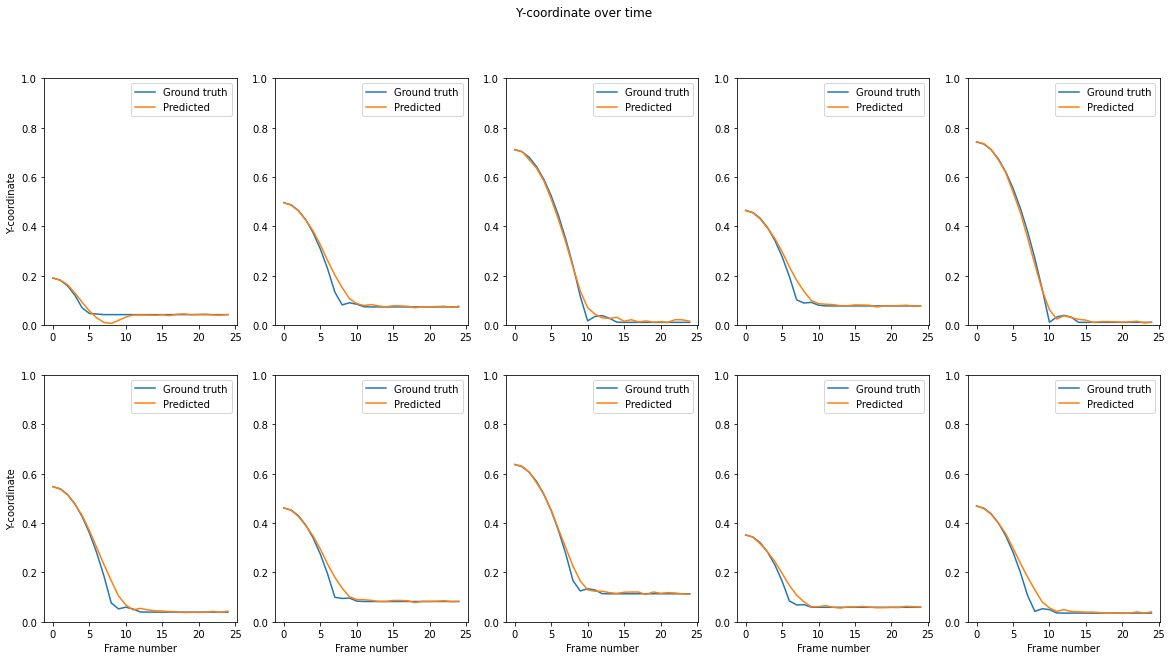

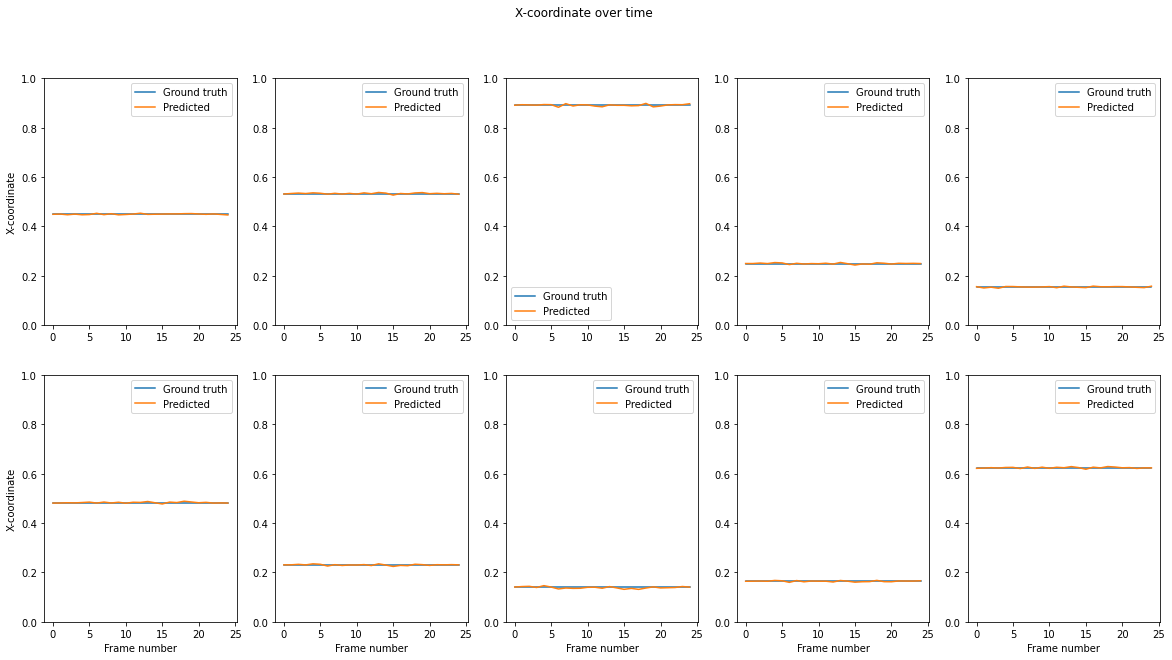

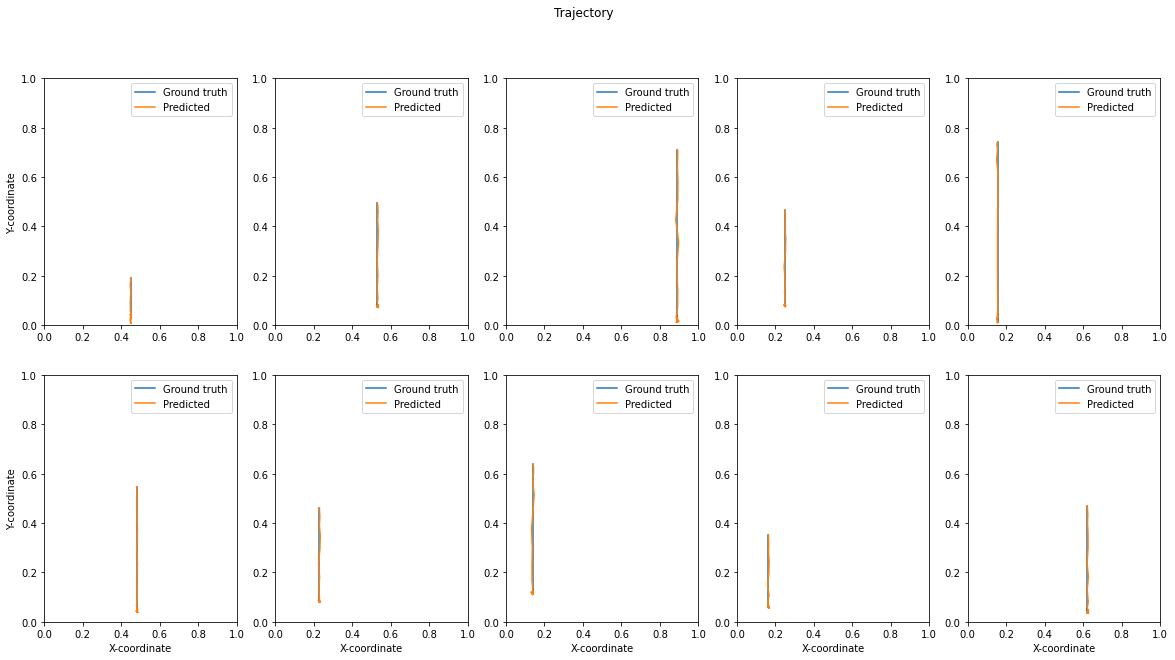

tensor(0.0165, grad_fn=<PowBackward0>)

In [5]:
gru = GRU.train_model(train_dataloader=train_dataloader, error_threshold=1000, input_dim=9, hidden_dim=64, num_rnns=1, output_dim=48, dropout_prob=0)
GRU.calculate_loss(gru, mse_pytorch, test_dataloader, test_data, visualize_first_10_trajectories=True)

# LSTM

LSTM(
  (lstm): LSTM(9, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=48, bias=True)
)
Epoch 0 complete. Training loss: 25.55796164693311
Epoch 1 complete. Training loss: 5.958738785935566
Epoch 2 complete. Training loss: 3.0675350370584056
Epoch 3 complete. Training loss: 1.919131503032986
Epoch 4 complete. Training loss: 1.3725299197249115
Epoch 5 complete. Training loss: 1.0886413779226132
Epoch 6 complete. Training loss: 0.9293686411692761
Epoch 7 complete. Training loss: 0.8337036726879887
Epoch 8 complete. Training loss: 0.7726912001962774
Epoch 9 complete. Training loss: 0.73153662920231
Epoch 10 complete. Training loss: 0.7022103652998339
Epoch 11 complete. Training loss: 0.6801615064323414
Epoch 12 complete. Training loss: 0.6627311645715963
Epoch 13 complete. Training loss: 0.6483284615096636
Epoch 14 complete. Training loss: 0.6359828936401755
Epoch 15 complete. Training loss: 0.6250902199826669
Epoch 16 complete. Training loss: 0.6152667524002027
Epoch 

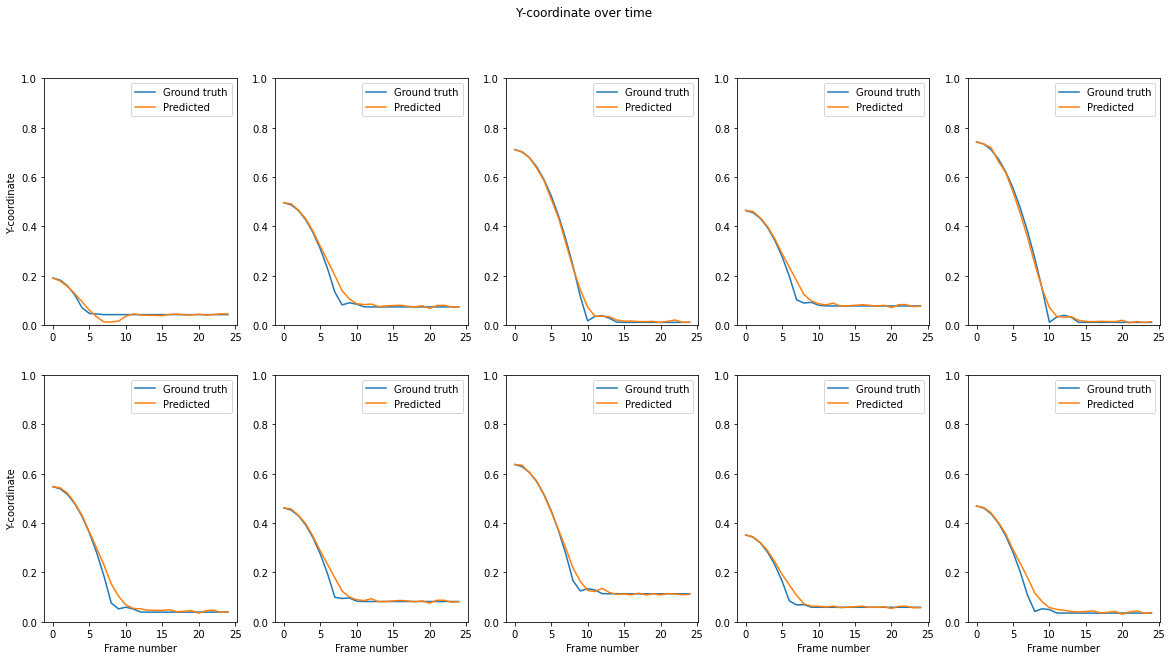

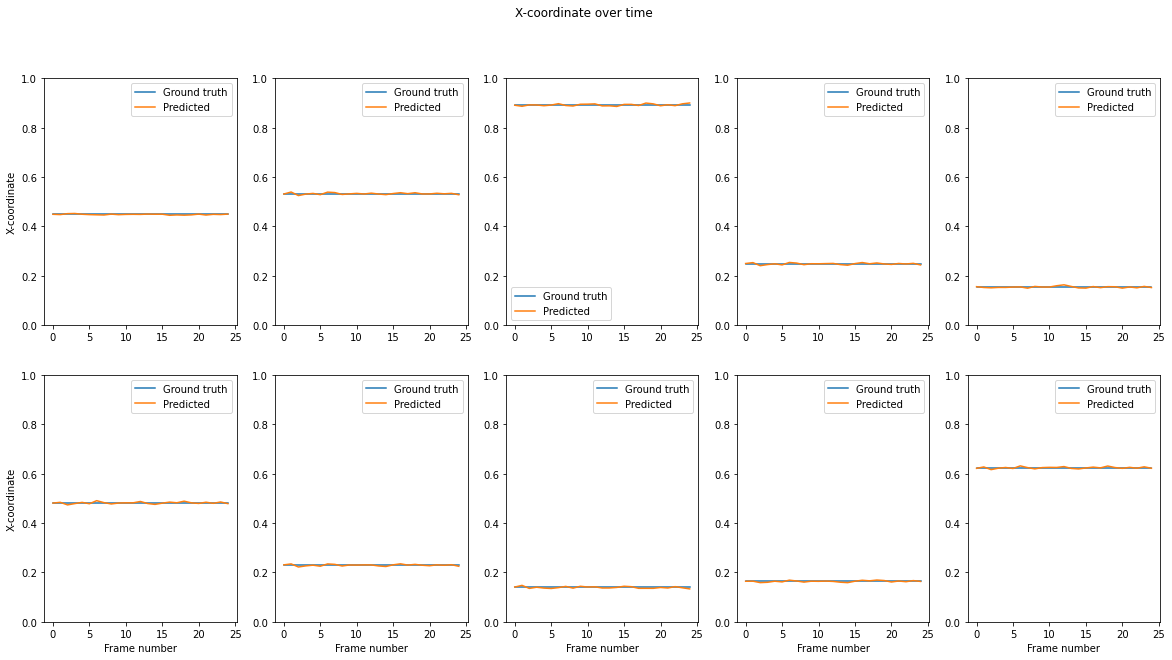

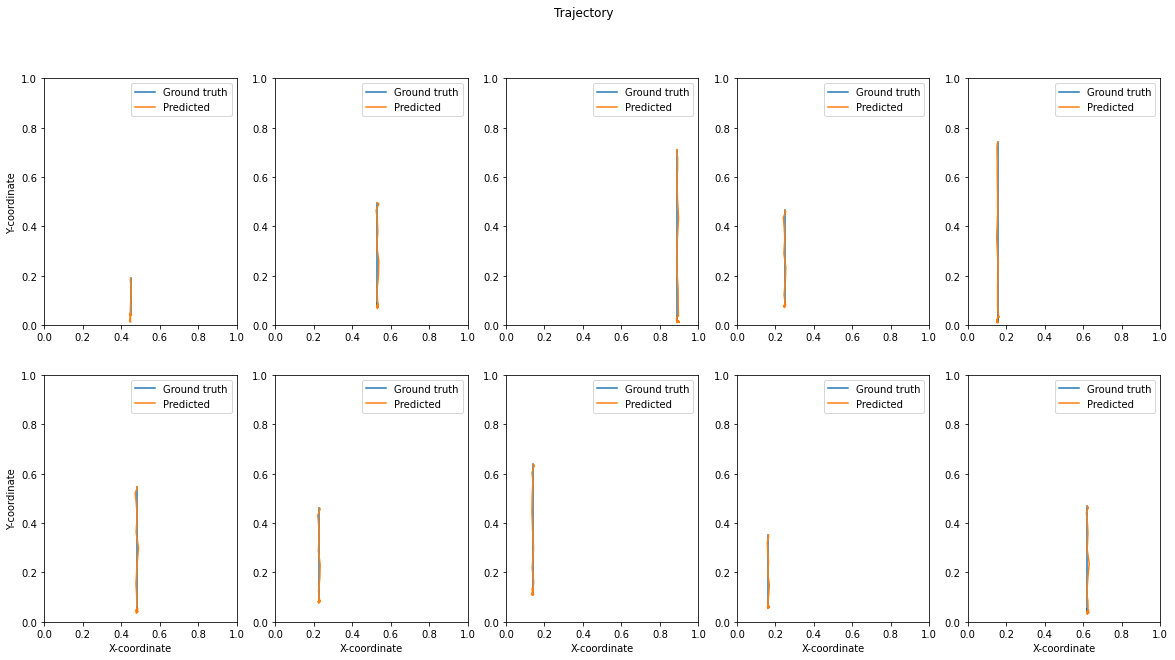

tensor(0.0158, grad_fn=<PowBackward0>)

In [6]:
lstm = LSTM.train_model(train_dataloader=train_dataloader, error_threshold=1000, input_dim=9, hidden_dim=64, num_rnns=1, output_dim=48, dropout_prob=0)
LSTM.calculate_loss(lstm, mse_pytorch, test_dataloader, test_data, visualize_first_10_trajectories=True)

# ESN

'Model-0': Model('Reservoir-0', 'Ridge-0')
Test loss:  0.025144609789246975


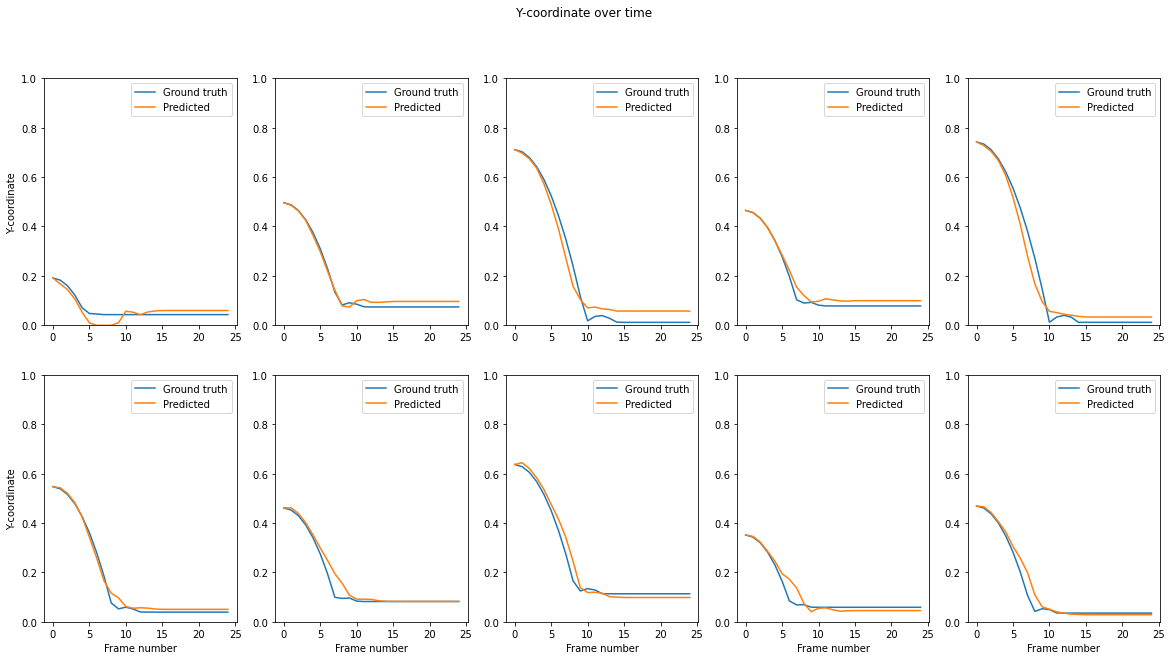

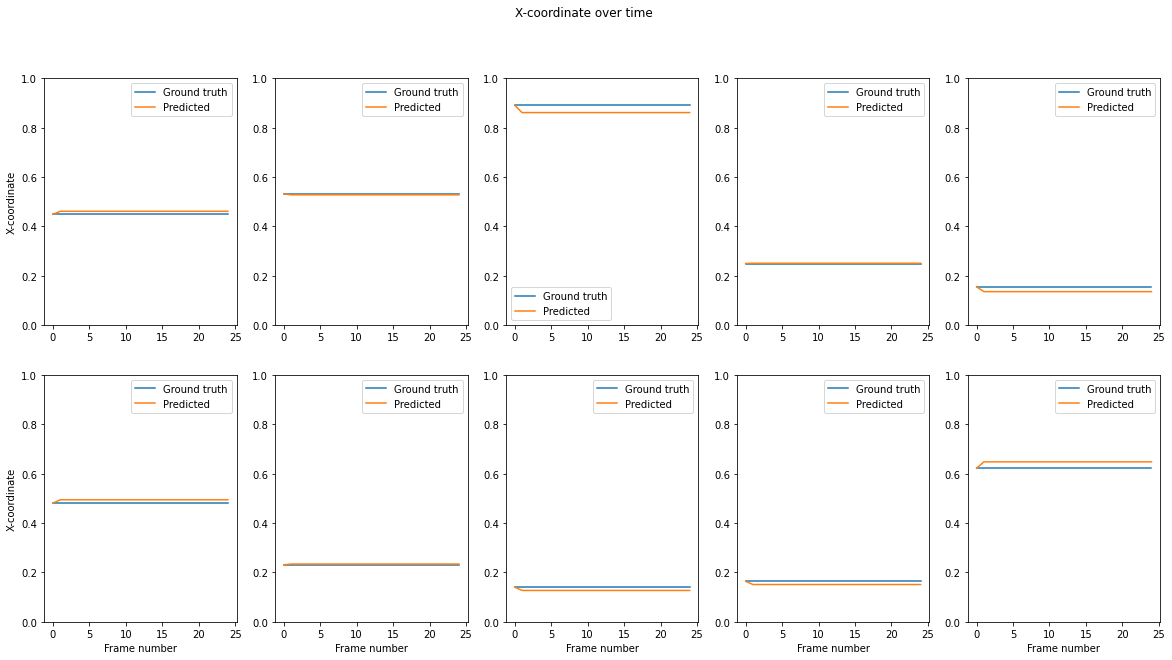

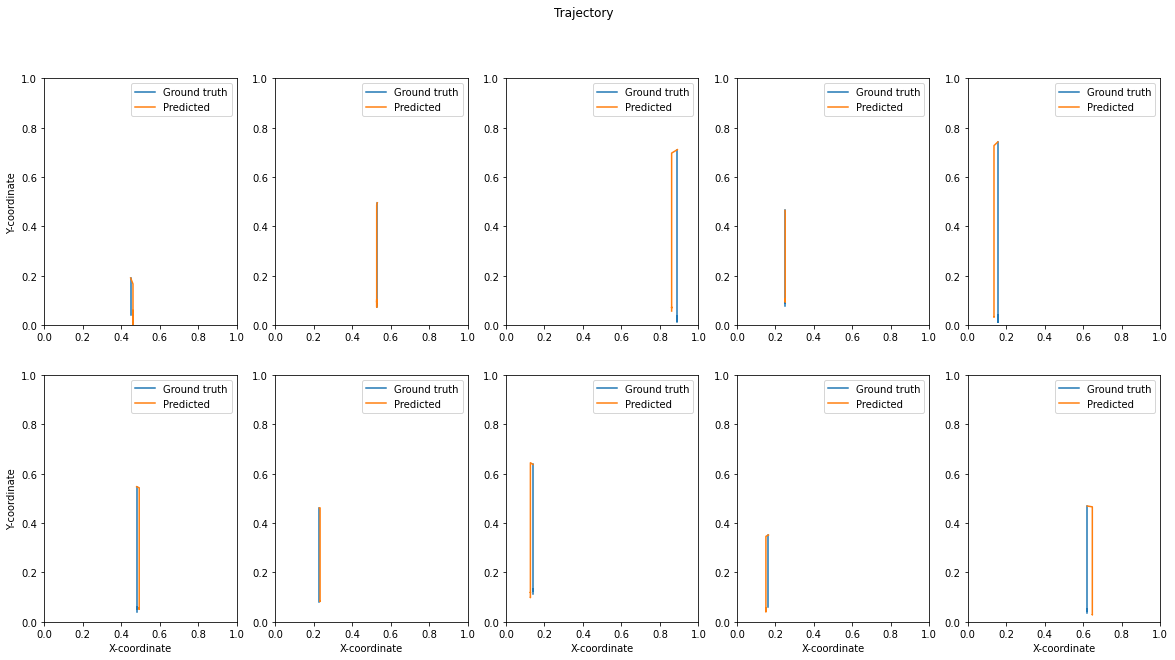

0.025144609789246975

In [7]:
rpy.set_seed(42)

esn = ESN.train_model(train_dataloader=train_dataloader, input_dim=9, reservoir_size=70, output_dim=48, leaking_rate=0.7, spectral_radius=0.95, ridge_param=0.01)
ESN.calculate_loss(esn, mse_esn, test_dataloader, test_data, visualize_first_10_trajectories=True)

# SeqESN

'Model-8': Model('Input-1', 'Reservoir-4', 'Ridge-4', 'Reservoir-5', 'Ridge-5')
Test loss:  0.037379344051423714


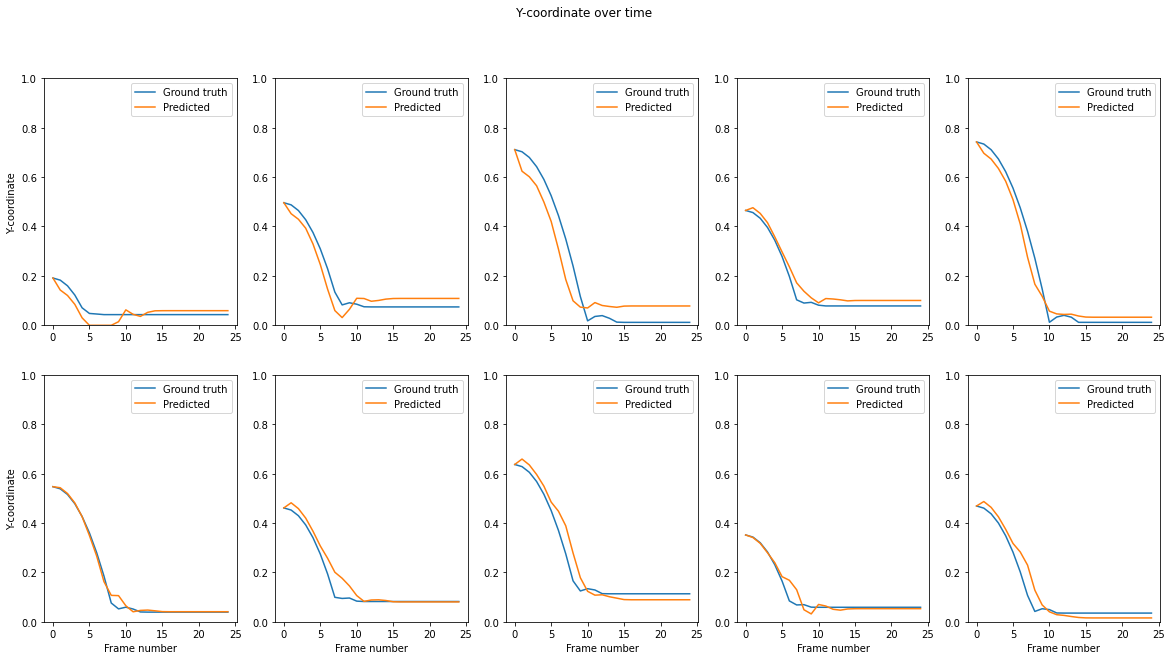

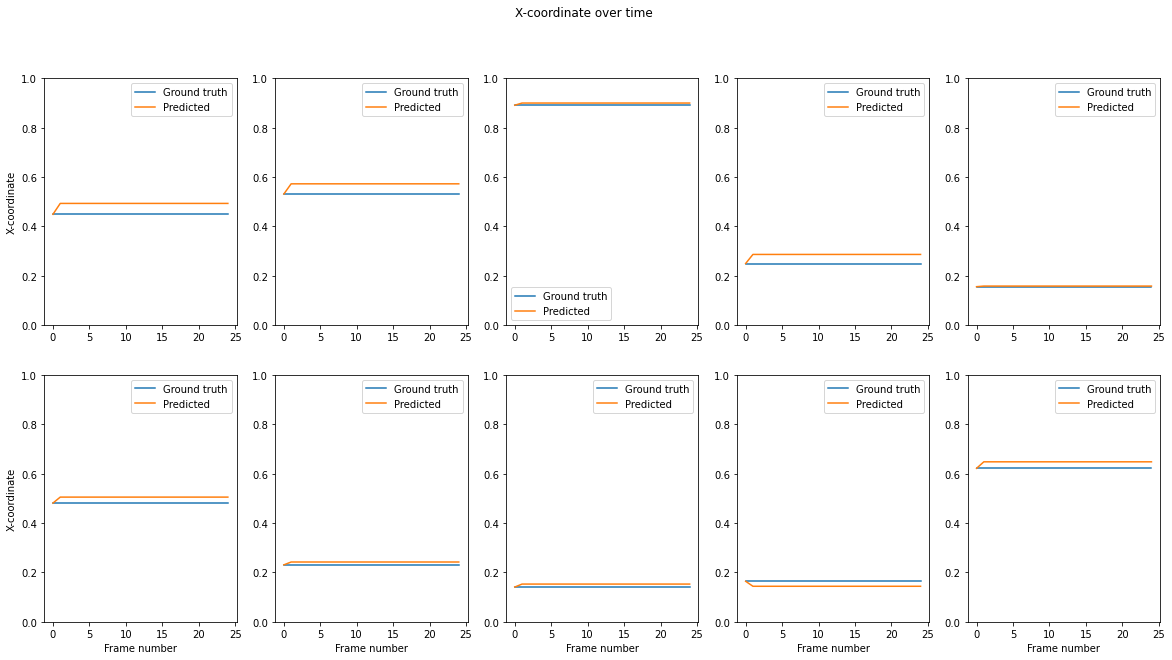

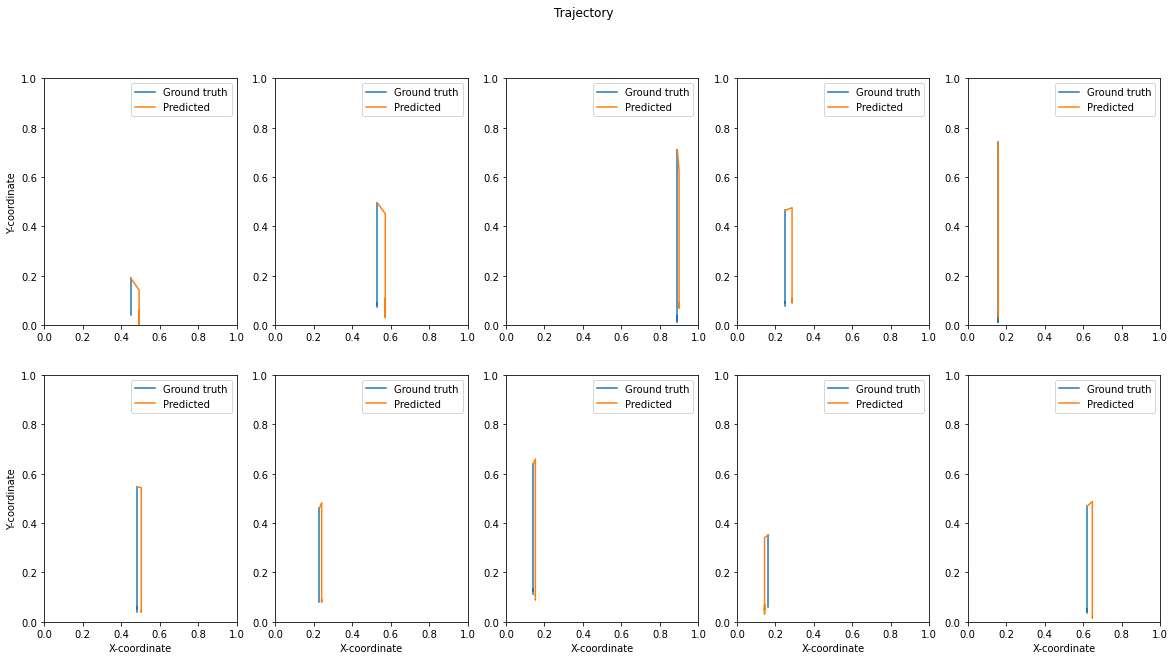

0.037379344051423714

In [11]:
rpy.set_seed(42)

seq_esn = SeqESN.train_model(train_dataloader=train_dataloader, input_dim=9, reservoir_size=70, output_dim=48, leaking_rate=0.7, spectral_radius=0.95, ridge_param=0.01, number_of_reservoirs=2)
SeqESN.calculate_loss(seq_esn, mse_esn, test_dataloader, test_data, visualize_first_10_trajectories=True)

# Parallel ESN

'Model-10': Model('Reservoir-7', 'Reservoir-6', 'Concat-2', 'Ridge-6')
Test loss:  0.025697525542454126


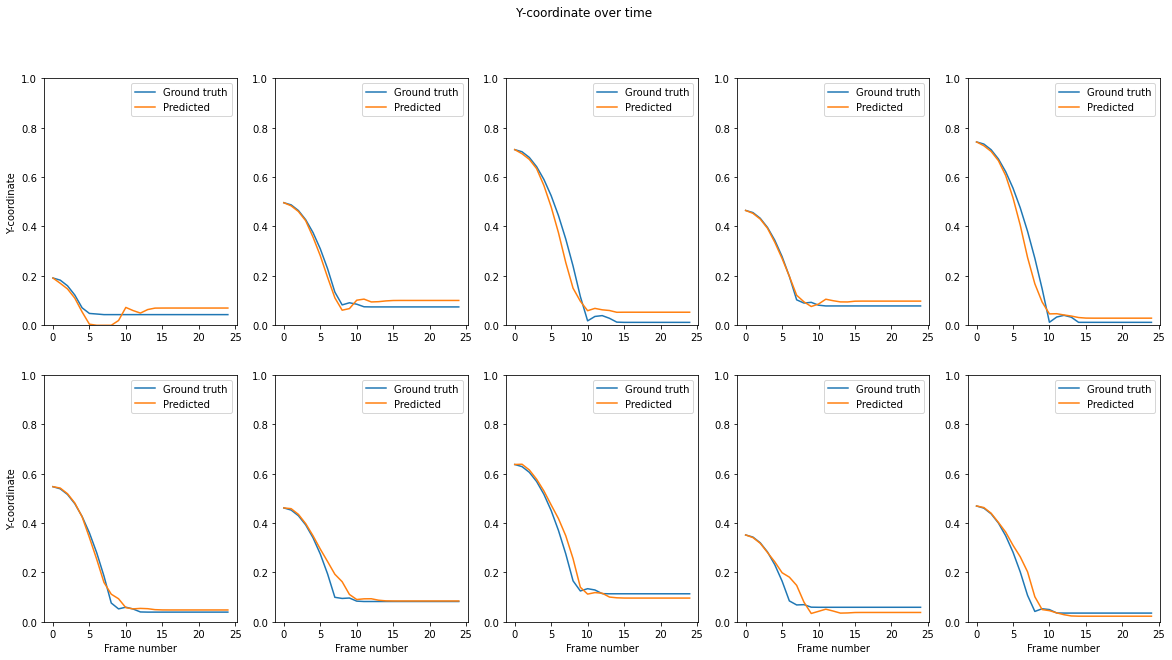

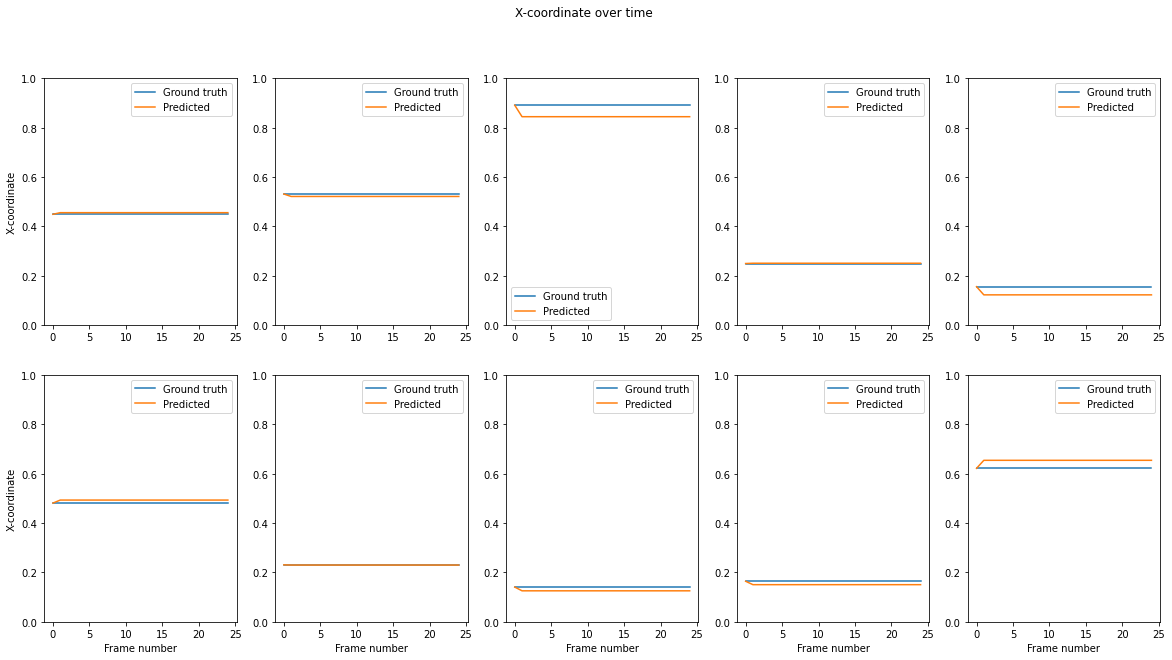

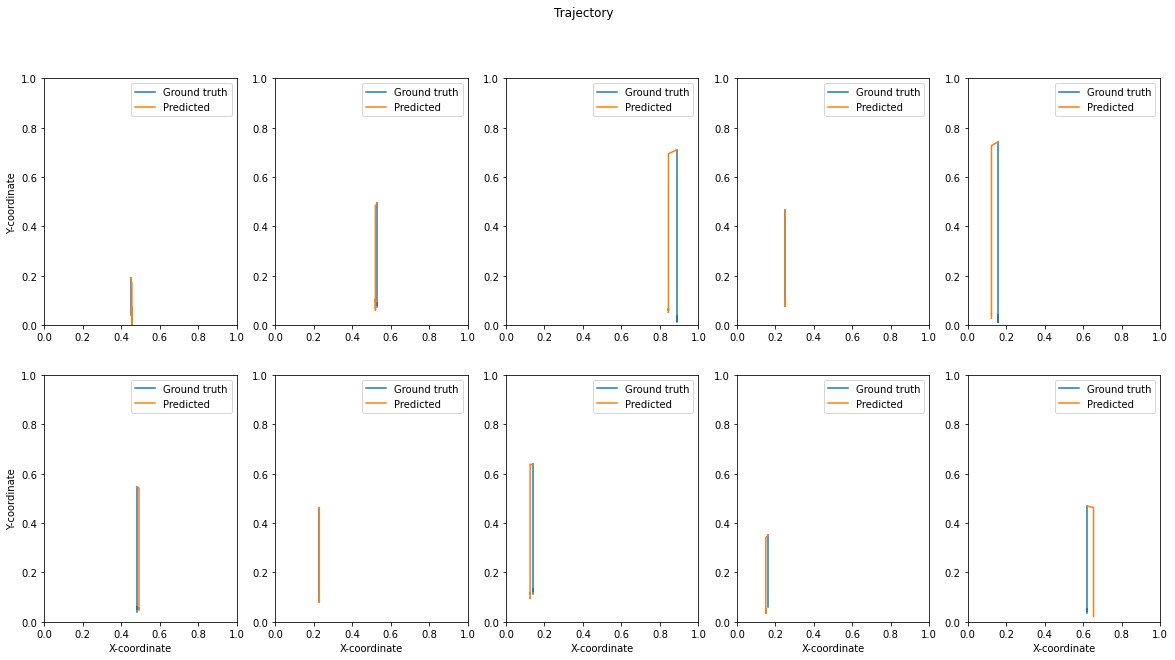

0.025697525542454126

In [12]:
rpy.set_seed(42)

parallel_esn = ParallelESN.train_model(train_dataloader=train_dataloader, input_dim=9, reservoir_size=70, output_dim=48, leaking_rate=0.7, spectral_radius=0.95, ridge_param=0.01, number_of_reservoirs=2)
ParallelESN.calculate_loss(parallel_esn, mse_esn, test_dataloader, test_data, visualize_first_10_trajectories=True)

# Grouped ESN

'Model-11': Model('Reservoir-9', 'Reservoir-8', 'Concat-3', 'Ridge-7')
Test loss:  0.0256975255424533


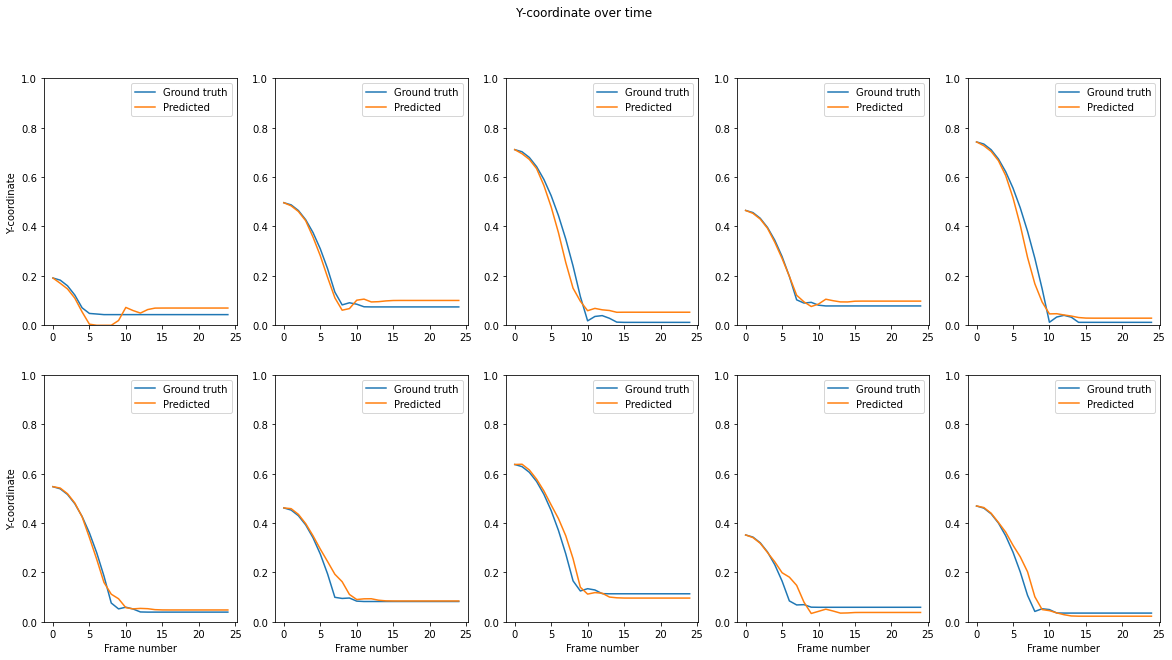

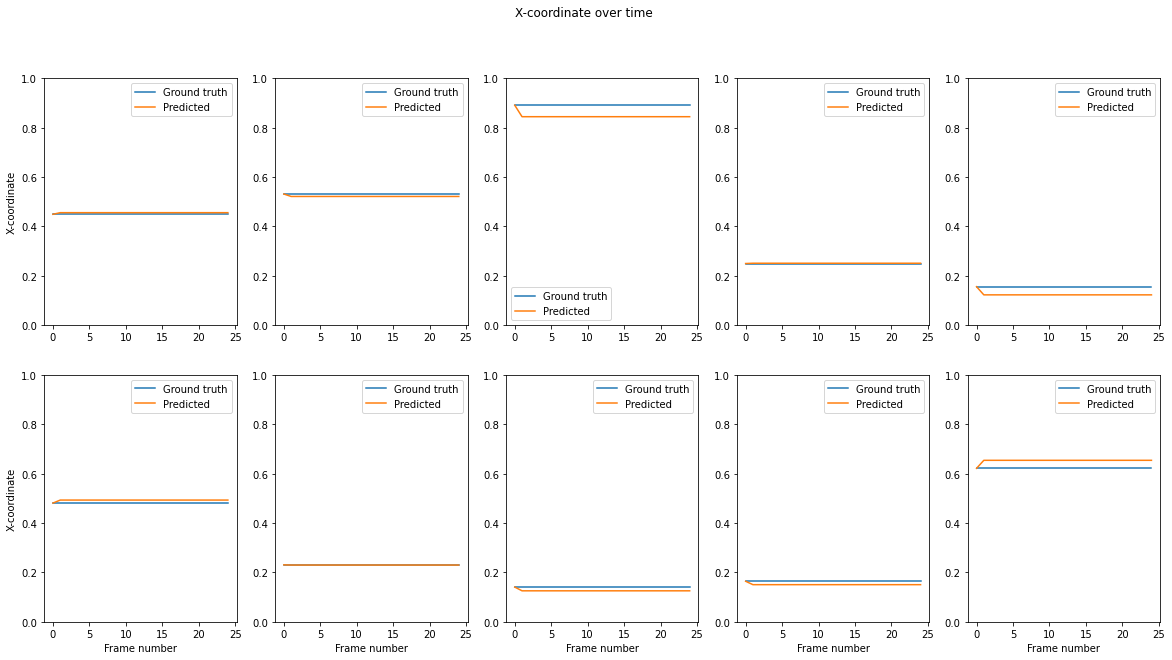

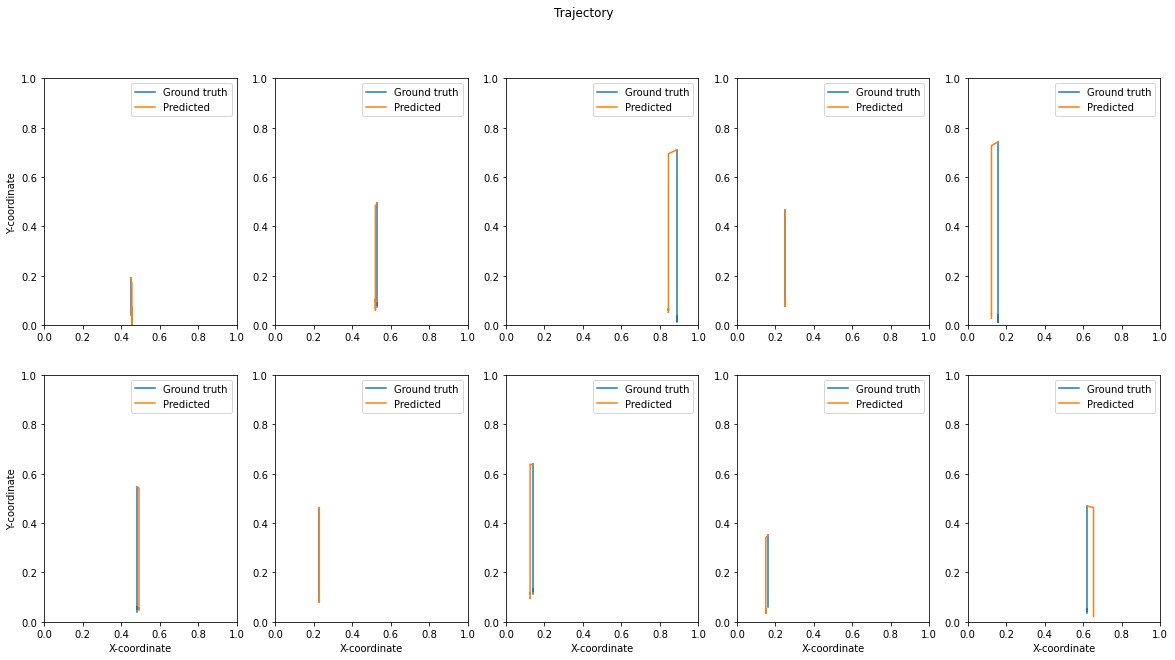

0.0256975255424533

In [13]:
rpy.set_seed(42)

grouped_esn = GroupedESN.train_model(train_dataloader=train_dataloader, input_dim=9, reservoir_size=70, output_dim=48, leaking_rate=0.7, spectral_radius=0.95, ridge_param=0.01, number_of_reservoirs=2)
GroupedESN.calculate_loss(grouped_esn, mse_esn, test_dataloader, test_data, visualize_first_10_trajectories=True)